### Sahil Bagga


# __Long vs Short Term Investements Across Different Sectors of the Economy__

### Background and Motivation

 I've always been intrigued and interested in understanding how the stock market operates and why the system works as it does. It's a very complex and difficult system to comprehend because of how many facets it has and how different aspects can affect a company's stock praice. Stock prices can be moved as a result of current events that are in relation to the company in some way because news regarding a company impacts how people view the company and the public's perspective often determines whether or not they will pay for the company's product, which directly impacts their revenue. Stocks can swing up or down depending on earnings reports for a company as well because they show whether a company is meeting its expected revenue targets for the current fiscal quarter. If a company is below the target for the fiscal quarter, it's evident that there is a shortcoming that the company needs to resolve and the stock will drop. On the flip side, if a company is above the target for the fiscal quarter, it's evident that the company is doing much better than the public anticipated and the stock will rise. 

Stock trading strategies, in the most elementary manner for our model and for the sake of simplicity, are either long term or short term. Long term typically means stock is bought and held for about at least 1 year before selling. Short term typically refers to within a few weeks or months. For our model, we assume short term to be 12 business days. The stock market is of acute importance in our nation since it's responsible for gauging the health of our economy and market which are directly responsible for how we live in our nation. I wanted to set out to understand and compare short term and long term investments in different sectors or industries of the economy to see if long term or short term investments are better or worse in different sectors of the economy.

### Methodology

#### My Approach
This analysis will require lots of historical stock data for many different stocks across many different sectors. For this analysis, I'm using a third party API from a company named Alpaca to retrieve the stock prices of different stocks over different periods of time. I also used pandas to read in a csv file with a list of different stock names and their respective sectors. I stored the stock symbols and industries into their own respective numpy arrays. I needed the stock symbols to make calls to the API for each stock symbol to retrieve the correct stock price over certain periods of time and I also needed the stock symbols to be able to organize the data into subsets and unique arrays that all are in the same sector. This allows for me to show trends in the data and portray how stocks in different sectors change over time and how they compare to one another.

#### How We Will Gather Data

As previously mentioned, I'm going to be using a third party API through a company named Alpaca to be able to retrieve the relevant stock prices and data I will need to perform my analysis. There are some important points to note before we begin collecting data: the number of stocks graphed for each sector will vary since the data for the stock symbols and their respective industries are being imported from a csv file that stores an arbitrary set of stocks for each of the industries listed. The sectors we will be modeling will be Health Care, Miscellaneous, Basic Industries, Capital Goods, Public Utilities, Consumer Services, Consumer Non-Durables, Transportation, Consumer Durables, Energy, Technology, and Finance. 

In [72]:
# Importing all needed modules including the alpaca api
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Keys and url needed to make calls to the alpaca api
APCA_API_BASE_URL = "https://paper-api.alpaca.markets"
API_KEY = "PKEZS7GSPAVR3P1UT195"
SECRET_KEY = "iifNp8Qug1lCKyvPWy4e0LSpAdEr4V7NEEVplDME"

#### Retrieving Stock Prices
I created a Stock Market class to keep all the code for the stocks packaged and secured together. The class organizes the stocks into groups by sector. The number of stock per sector varies and is not the same across industries because the data that was loaded in had different numbers of stock for each sector. Each function in the class is responsible for plotting the data for the stock price of each stock at three different time points: current day, 12 days ago (about 2 weeks), and about 1 year ago. It's important to note that even though almost all stock have data for upwards of 1 year ago, some stocks do not have data for this time frame because they went public less than one year ago. For this reason, I access the last price of the data retrieved that shows the prices of the stock which is either the stock price 365 days ago or if that data is not available it returns the oldest stock price available.

In [73]:
class Stock_Market:
    def __init__(self):
        self.alpaca = tradeapi.REST(API_KEY, SECRET_KEY, APCA_API_BASE_URL, 'v2')
        self.data = pd.read_csv("companylist.csv")

        self.health_care_short_term = []
        self.health_care_long_term = []
        self.health_care_current = []
        
        self.miscellaneous_short_term = []
        self.miscellaneous_long_term = []
        self.miscellaneous_current = []
        
        self.basic_industries_long_term = []
        self.basic_industries_short_term = []
        self.basic_industries_current = []
        
        self.capital_goods_long_term = []
        self.capital_goods_short_term = []
        self.capital_goods_current = []
        
        self.public_utilities_long_term = []
        self.public_utilities_short_term = []
        self.public_utilities_current = []
        
        self.consumer_services_long_term = []
        self.consumer_services_short_term = []
        self.consumer_services_current = []
        
        self.consumer_non_durables_long_term = []
        self.consumer_non_durables_short_term = []
        self.consumer_non_durables_current = []
        
        self.transportation_long_term = []
        self.transportation_short_term = []
        self.transportation_current = []
        
        self.consumer_durables_long_term = []
        self.consumer_durables_short_term = []
        self.consumer_durables_current = []
        
        self.energy_long_term = []
        self.energy_short_term = []
        self.energy_current = []
        
        self.technology_long_term = []
        self.technology_short_term = []
        self.technology_current = []

        self.finance_short_term = []
        self.finance_long_term = []
        self.finance_current = []

    def health_care(self):
        health_care = np.array((self.data[self.data["Sector"] == "Health Care"]["Symbol"]))

        length = 365
        for index in range(0, int(len(health_care)/7)):
            bars = self.alpaca.get_barset(health_care[index], 'day', limit=length)
            stock_bars = bars[health_care[index]]
            self.health_care_short_term.append(stock_bars[-12].o)
            self.health_care_long_term.append(stock_bars[0].o)
            self.health_care_current.append(stock_bars[-1].c)
            
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.health_care_short_term))
        plt.scatter(x, self.health_care_short_term, c='red')
        plt.scatter(x, self.health_care_long_term, c='blue')
        plt.scatter(x, self.health_care_current, c='green')

        plt.plot(x, self.health_care_short_term, c='red', label="health-care-12-days-ago")
        plt.plot(x, self.health_care_long_term, c='blue', label="health-care-365-days-ago")
        plt.plot(x, self.health_care_current, c='green', label="health-care-current")

        plt.legend()
        plt.show()
        
    def miscellaneous(self):
        miscellaneous = np.array((self.data[self.data["Sector"] == "Miscellaneous"]["Symbol"]))

        length = 365
        for index in range(0, int(len(miscellaneous))):
            bars = self.alpaca.get_barset(miscellaneous[index], 'day', limit=length)
            stock_bars = bars[miscellaneous[index]]
            self.miscellaneous_short_term.append(stock_bars[-12].o)
            self.miscellaneous_long_term.append(stock_bars[0].o)
            self.miscellaneous_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.miscellaneous_short_term))
        plt.scatter(x, self.miscellaneous_short_term, c='red')
        plt.scatter(x, self.miscellaneous_long_term, c='blue')
        plt.scatter(x, self.miscellaneous_current, c='green')

        plt.plot(x, self.miscellaneous_short_term, c='red', label="miscellaneous-12-days-ago")
        plt.plot(x, self.miscellaneous_long_term, c='blue', label="miscellaneous-365-days-ago")
        plt.plot(x, self.miscellaneous_current, c='green', label="miscellaneous-current")

        plt.legend()
        plt.show()

    def basic_industries(self):
        basic_industries = np.array((self.data[self.data["Sector"] == "Basic Industries"]["Symbol"]))

        length = 365
        for index in range(0, int(len(basic_industries))):
            bars = self.alpaca.get_barset(basic_industries[index], 'day', limit=length)
            stock_bars = bars[basic_industries[index]]
            self.basic_industries_short_term.append(stock_bars[-12].o)
            self.basic_industries_long_term.append(stock_bars[0].o)
            self.basic_industries_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.basic_industries_short_term))
        plt.scatter(x, self.basic_industries_short_term, c='red')
        plt.scatter(x, self.basic_industries_long_term, c='blue')
        plt.scatter(x, self.basic_industries_current, c='green')

        plt.plot(x, self.basic_industries_short_term, c='red', label="basic-industries-12-days-ago")
        plt.plot(x, self.basic_industries_long_term, c='blue', label="basic-industries-365-days-ago")
        plt.plot(x, self.basic_industries_current, c='green', label="basic-industries-current")

        plt.legend()
        plt.show()
    
    def capital_goods(self):
        capital_goods = np.array((self.data[self.data["Sector"] == "Capital Goods"]["Symbol"]))

        length = 365
        for index in range(0, int(len(capital_goods)/2)):
            bars = self.alpaca.get_barset(capital_goods[index], 'day', limit=length)
            stock_bars = bars[capital_goods[index]]
            self.capital_goods_short_term.append(stock_bars[-12].o)
            self.capital_goods_long_term.append(stock_bars[0].o)
            self.capital_goods_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.capital_goods_short_term))
        plt.scatter(x, self.capital_goods_short_term, c='red')
        plt.scatter(x, self.capital_goods_long_term, c='blue')
        plt.scatter(x, self.capital_goods_current, c='green')

        plt.plot(x, self.capital_goods_short_term, c='red', label="capital-goods-12-days-ago")
        plt.plot(x, self.capital_goods_long_term, c='blue', label="capital-goods-365-days-ago")
        plt.plot(x, self.capital_goods_current, c='green', label="capital-goods-current")

        plt.legend()
        plt.show()

    def public_utilities(self):
        public_utilities = np.array((self.data[self.data["Sector"] == "Public Utilities"]["Symbol"]))

        length = 365
        for index in range(0, int(len(public_utilities))):
            bars = self.alpaca.get_barset(public_utilities[index], 'day', limit=length)
            stock_bars = bars[public_utilities[index]]
            self.public_utilities_short_term.append(stock_bars[-12].o)
            self.public_utilities_long_term.append(stock_bars[0].o)
            self.public_utilities_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.public_utilities_short_term))
        plt.scatter(x, self.public_utilities_short_term, c='red')
        plt.scatter(x, self.public_utilities_long_term, c='blue')
        plt.scatter(x, self.public_utilities_current, c='green')

        plt.plot(x, self.public_utilities_short_term, c='red', label="public-utilities-12-days-ago")
        plt.plot(x, self.public_utilities_long_term, c='blue', label="public-utilities-365-days-ago")
        plt.plot(x, self.public_utilities_current, c='green', label="public-utilities-current")

        plt.legend()
        plt.show()
    
    def consumer_services(self):
        consumer_services = np.array((self.data[self.data["Sector"] == "Consumer Services"]["Symbol"]))

        length = 365
        for index in range(0, int(len(consumer_services)/7)):
            bars = self.alpaca.get_barset(consumer_services[index], 'day', limit=length)
            stock_bars = bars[consumer_services[index]]
            self.consumer_services_short_term.append(stock_bars[-12].o)
            self.consumer_services_long_term.append(stock_bars[0].o)
            self.consumer_services_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.consumer_services_short_term))
        plt.scatter(x, self.consumer_services_short_term, c='red')
        plt.scatter(x, self.consumer_services_long_term, c='blue')
        plt.scatter(x, self.consumer_services_current, c='green')

        plt.plot(x, self.consumer_services_short_term, c='red', label="consumer-services-12-days-ago")
        plt.plot(x, self.consumer_services_long_term, c='blue', label="consumer-services-365-days-ago")
        plt.plot(x, self.consumer_services_current, c='green', label="consumer-services-current")

        plt.legend()
        plt.show()

    def consumer_non_durables(self):
        consumer_non_durables = np.array((self.data[self.data["Sector"] == "Consumer Non-Durables"]["Symbol"]))

        length = 365
        for index in range(0, int(len(consumer_non_durables))):
            bars = self.alpaca.get_barset(consumer_non_durables[index], 'day', limit=length)
            stock_bars = bars[consumer_non_durables[index]]
            self.consumer_non_durables_short_term.append(stock_bars[-12].o)
            self.consumer_non_durables_long_term.append(stock_bars[0].o)
            self.consumer_non_durables_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.consumer_non_durables_short_term))
        plt.scatter(x, self.consumer_non_durables_short_term, c='red')
        plt.scatter(x, self.consumer_non_durables_long_term, c='blue')
        plt.scatter(x, self.consumer_non_durables_current, c='green')

        plt.plot(x, self.consumer_non_durables_short_term, c='red', label="consumer-non-durables-12-days-ago")
        plt.plot(x, self.consumer_non_durables_long_term, c='blue', label="consumer-non-durables-365-days-ago")
        plt.plot(x, self.consumer_non_durables_current, c='green', label="consumer-non-durables-current")

        plt.legend()
        plt.show()

    def transportation(self):
        transportation = np.array((self.data[self.data["Sector"] == "Transportation"]["Symbol"]))

        length = 365
        for index in range(0, int(len(transportation))):
            bars = self.alpaca.get_barset(transportation[index], 'day', limit=length)
            stock_bars = bars[transportation[index]]
            self.transportation_short_term.append(stock_bars[-12].o)
            self.transportation_long_term.append(stock_bars[0].o)
            self.transportation_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.transportation_short_term))
        plt.scatter(x, self.transportation_short_term, c='red')
        plt.scatter(x, self.transportation_long_term, c='blue')
        plt.scatter(x, self.transportation_current, c='green')

        plt.plot(x, self.transportation_short_term, c='red', label="transportation-12-days-ago")
        plt.plot(x, self.transportation_long_term, c='blue', label="transportation-365-days-ago")
        plt.plot(x, self.transportation_current, c='green', label="transportation-current")
        plt.bar

        plt.legend()
        plt.show()

    def consumer_durables(self):
        consumer_durables = np.array((self.data[self.data["Sector"] == "Consumer Durables"]["Symbol"]))

        length = 365
        for index in range(0, int(len(consumer_durables))):
            bars = self.alpaca.get_barset(consumer_durables[index], 'day', limit=length)
            stock_bars = bars[consumer_durables[index]]
            self.consumer_durables_short_term.append(stock_bars[-12].o)
            self.consumer_durables_long_term.append(stock_bars[0].o)
            self.consumer_durables_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.consumer_durables_short_term))
        plt.scatter(x, self.consumer_durables_short_term, c='red')
        plt.scatter(x, self.consumer_durables_long_term, c='blue')
        plt.scatter(x, self.consumer_durables_current, c='green')

        plt.plot(x, self.consumer_durables_short_term, c='red', label="consumer-durables-12-days-ago")
        plt.plot(x, self.consumer_durables_long_term, c='blue', label="consumer-durables-365-days-ago")
        plt.plot(x, self.consumer_durables_current, c='green', label="consumer-durables-current")

        plt.legend()
        plt.show()
        
    def energy(self):
        energy = np.array((self.data[self.data["Sector"] == "Energy"]["Symbol"]))

        length = 365
        for index in range(0, int(len(energy)/2)):
            bars = self.alpaca.get_barset(energy[index], 'day', limit=length)
            stock_bars = bars[energy[index]]
            self.energy_short_term.append(stock_bars[-24].o)
            self.energy_long_term.append(stock_bars[0].o)
            self.energy_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.energy_short_term))
        plt.scatter(x, self.energy_short_term, c='red')
        plt.scatter(x, self.energy_long_term, c='blue')
        plt.scatter(x, self.energy_current, c='green')

        plt.plot(x, self.energy_short_term, c='red', label="energy-24-days-ago")
        plt.plot(x, self.energy_long_term, c='blue', label="energy-365-days-ago")
        plt.plot(x, self.energy_current, c='green', label="energy-current")

        plt.legend()
        plt.show()
        
    def technology(self):
        technology = np.array((self.data[self.data["Sector"] == "Technology"]["Symbol"]))

        length = 365
        for index in range(0, int(len(technology)/7)):
            bars = self.alpaca.get_barset(technology[index], 'day', limit=length)
            stock_bars = bars[technology[index]]
            self.technology_short_term.append(stock_bars[-12].o)
            self.technology_long_term.append(stock_bars[0].o)
            self.technology_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.technology_short_term))
        plt.scatter(x, self.technology_short_term, c='red')
        plt.scatter(x, self.technology_long_term, c='blue')
        plt.scatter(x, self.technology_current, c='green')

        plt.plot(x, self.technology_short_term, c='red', label="technology-12-days-ago")
        plt.plot(x, self.technology_long_term, c='blue', label="technology-365-days-ago")
        plt.plot(x, self.technology_current, c='green', label="technology-current")

        plt.legend()
        plt.show()
        
    def finance(self):
        finance = np.array((self.data[self.data["Sector"] == "Finance"]["Symbol"]))

        length = 365
        for index in range(0, int(len(finance)/7)):
            bars = self.alpaca.get_barset(finance[index], 'day', limit=length)
            stock_bars = bars[finance[index]]
            self.finance_short_term.append(stock_bars[-12].o)
            self.finance_long_term.append(stock_bars[0].o)
            self.finance_current.append(stock_bars[-1].c)
        print("Done!")

        plt.figure(figsize=(15,5))
        x = np.arange(0, len(self.finance_short_term))
        plt.scatter(x, self.finance_short_term, c='red')
        plt.scatter(x, self.finance_long_term, c='blue')
        plt.scatter(x, self.finance_current, c='green')

        plt.plot(x, self.finance_short_term, c='red', label="finance-12-days-ago")
        plt.plot(x, self.finance_long_term, c='blue', label="finance-365-days-ago")
        plt.plot(x, self.finance_current, c='green', label="finance-current")

        plt.legend()
        plt.show()

#### Graphing The Aggragated Data

Once we collect the data in each respective sector's array, we will graph the current price of the stock, the price 12 days ago, and the stock one year ago or the oldest stock price if the stock is less than 1 year old. We will graph both the scatter plot data as well as the line graphs for each stock to denotate the actual price points for each respective stock in each sector but also show the differences in stock prices across different stocks in the same sector so that we can see the variation in price within the same stock to highlight outliers but also identify the general trend and price point for stocks in each sector. 

In [70]:
data = Stock_Market()

Done!


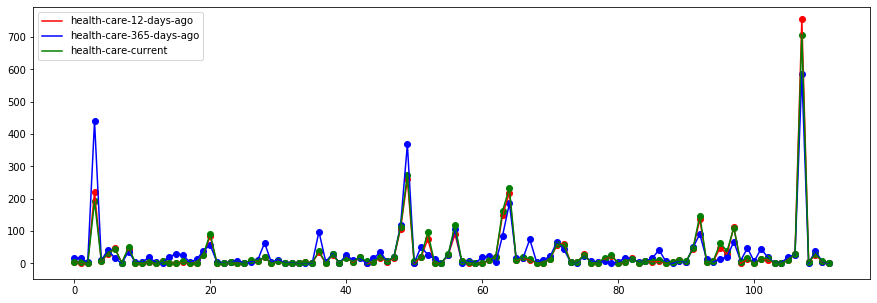

In [71]:
data.health_care()

Text(0, 0.5, 'Percent change')

<Figure size 1080x360 with 0 Axes>

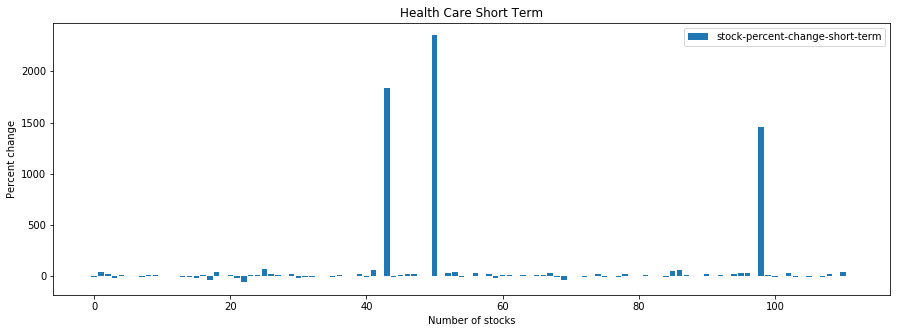

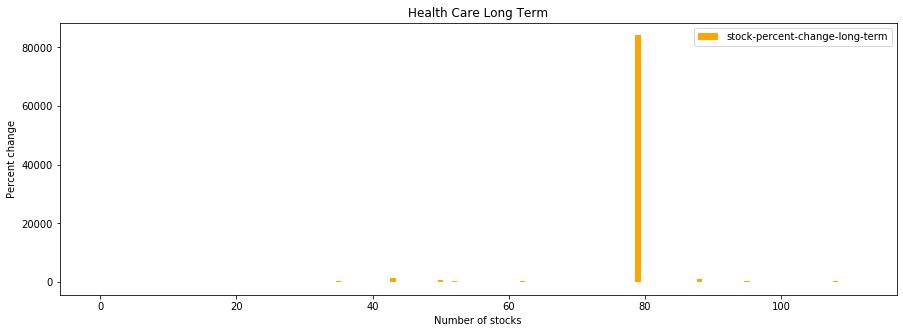

In [10]:
health_care_percent_change_long_term = []
health_care_percent_change_short_term = []
for i in range(len(data.health_care_short_term)):
    health_care_percent_change_short_term.append((data.health_care_current[i] - data.health_care_short_term[i]) / data.health_care_short_term[i] * 100)
    
for i in range(len(data.health_care_long_term)):
    health_care_percent_change_long_term.append((data.health_care_current[i] - data.health_care_long_term[i]) / data.health_care_long_term[i] * 100)
    
    

plt.figure(figsize=(15,5))
x = np.arange(0, len(health_care_percent_change_long_term))
'''plt.scatter(x, health_care_percent_change_short_term, c='red')
plt.scatter(x, health_care_percent_change_long_term, c='blue')'''

plt.figure(figsize=(15,5))
plt.bar(x, health_care_percent_change_short_term, label="stock-percent-change-short-term")
plt.title("Health Care Short Term")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

plt.figure(figsize=(15,5))
plt.bar(x, health_care_percent_change_long_term, color="orange", label="stock-percent-change-long-term")
plt.title("Health Care Long Term")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


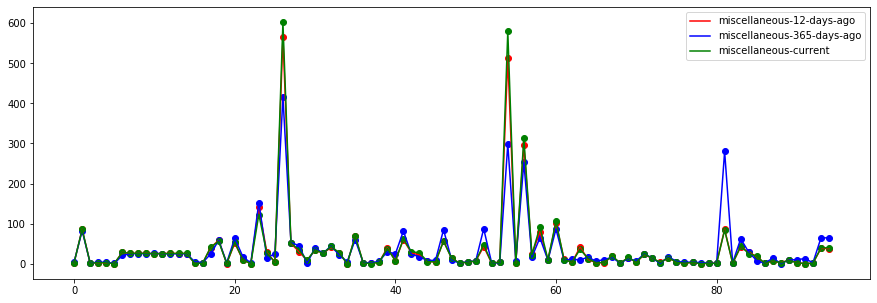

In [63]:
data.miscellaneous()

Text(0, 0.5, 'Percent change')

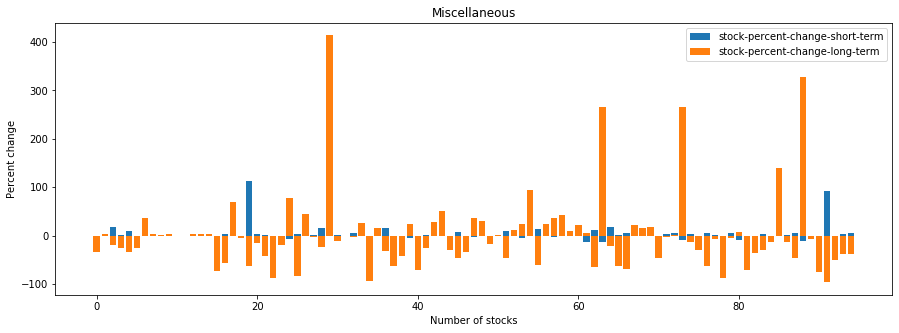

In [64]:
miscellaneous_percent_change_long_term = []
miscellaneous_percent_change_short_term = []
for i in range(len(data.miscellaneous_short_term)):
    miscellaneous_percent_change_short_term.append((data.miscellaneous_current[i] - data.miscellaneous_short_term[i]) / data.miscellaneous_short_term[i] * 100)
    
for i in range(len(data.miscellaneous_long_term)):
    miscellaneous_percent_change_long_term.append((data.miscellaneous_current[i] - data.miscellaneous_long_term[i]) / data.miscellaneous_long_term[i] * 100)


plt.figure(figsize=(15,5))
x = np.arange(0, len(miscellaneous_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, miscellaneous_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, miscellaneous_percent_change_long_term, label="stock-percent-change-long-term")
plt.legend()
plt.title("Miscellaneous")
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


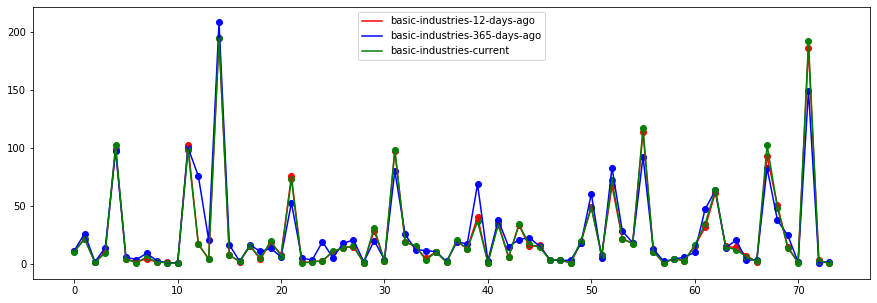

In [23]:
data.basic_industries()

Text(0, 0.5, 'Percent change')

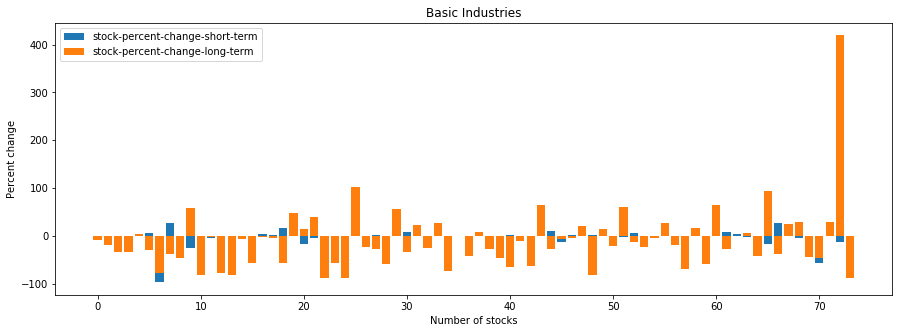

In [24]:
basic_industries_percent_change_long_term = []
basic_industries_percent_change_short_term = []
for i in range(len(data.basic_industries_short_term)):
    basic_industries_percent_change_short_term.append((data.basic_industries_current[i] - data.basic_industries_short_term[i]) / data.basic_industries_current[i] * 100)
    
for i in range(len(data.basic_industries_long_term)):
    basic_industries_percent_change_long_term.append((data.basic_industries_current[i] - data.basic_industries_long_term[i]) / data.basic_industries_long_term[i] * 100)


plt.figure(figsize=(15,5))
x = np.arange(0, len(basic_industries_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, basic_industries_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, basic_industries_percent_change_long_term, label="stock-percent-change-long-term")
plt.title("Basic Industries")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


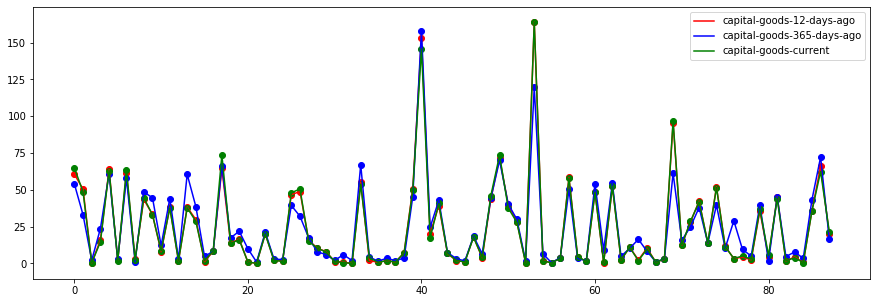

In [31]:
data.capital_goods()

Text(0, 0.5, 'Percent change')

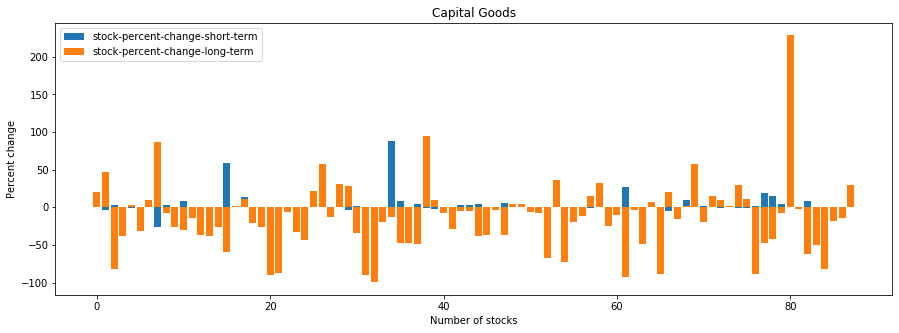

In [32]:
capital_goods_percent_change_long_term = []
capital_goods_percent_change_short_term = []
for i in range(len(data.capital_goods_short_term)):
    capital_goods_percent_change_short_term.append((data.capital_goods_current[i] - data.capital_goods_short_term[i]) / data.capital_goods_short_term[i] * 100)
    
for i in range(len(data.capital_goods_long_term)):
    capital_goods_percent_change_long_term.append((data.capital_goods_current[i] - data.capital_goods_long_term[i]) / data.capital_goods_long_term[i] * 100)


plt.figure(figsize=(15,5))
x = np.arange(0, len(capital_goods_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, capital_goods_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, capital_goods_percent_change_long_term, label="stock-percent-change-long-term")
plt.title("Capital Goods")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


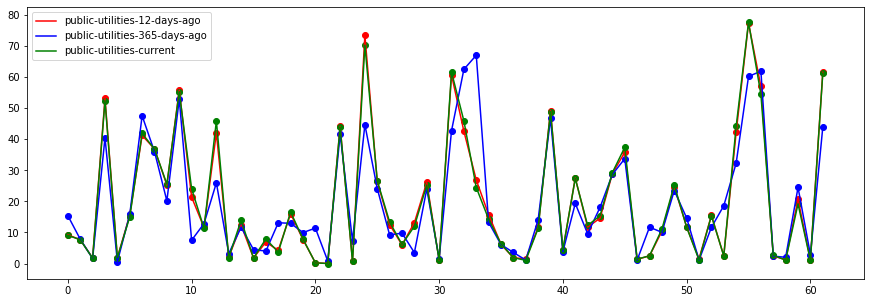

In [33]:
data.public_utilities()

Text(0, 0.5, 'Percent change')

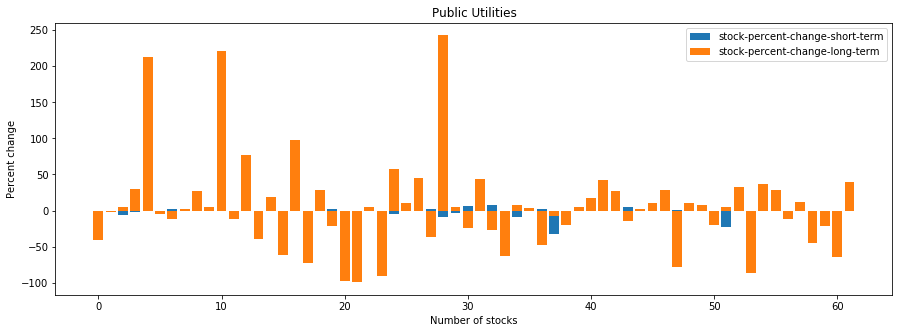

In [34]:
public_utilities_percent_change_long_term = []
public_utilities_percent_change_short_term = []
for i in range(len(data.public_utilities_short_term)):
    public_utilities_percent_change_short_term.append((data.public_utilities_current[i] - data.public_utilities_short_term[i]) / data.public_utilities_short_term[i] * 100)
    
for i in range(len(data.public_utilities_long_term)):
    public_utilities_percent_change_long_term.append((data.public_utilities_current[i] - data.public_utilities_long_term[i]) / data.public_utilities_long_term[i] * 100)


plt.figure(figsize=(15,5))
x = np.arange(0, len(public_utilities_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, public_utilities_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, public_utilities_percent_change_long_term, label="stock-percent-change-long-term")
plt.title("Public Utilities")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


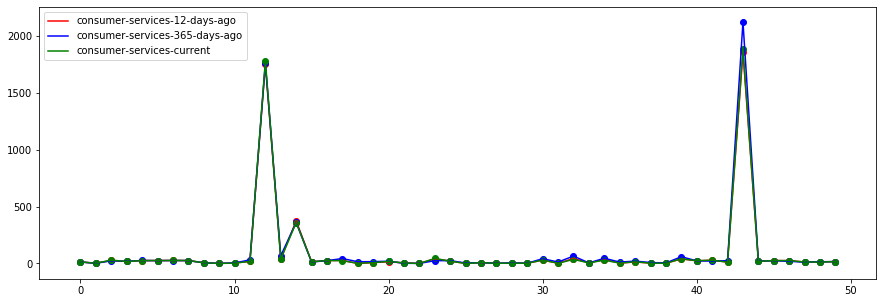

In [35]:
data.consumer_services()

Text(0, 0.5, 'Percent change')

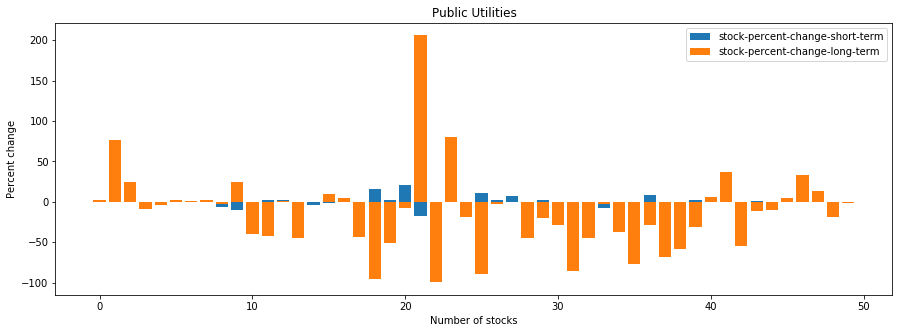

In [36]:
consumer_services_percent_change_long_term = []
consumer_services_percent_change_short_term = []
for i in range(len(data.consumer_services_short_term)):
    consumer_services_percent_change_short_term.append((data.consumer_services_current[i] - data.consumer_services_short_term[i]) / data.consumer_services_short_term[i] * 100)
    
for i in range(len(data.consumer_services_long_term)):
    consumer_services_percent_change_long_term.append((data.consumer_services_current[i] - data.consumer_services_long_term[i]) / data.consumer_services_long_term[i] * 100)


plt.figure(figsize=(15,5))
x = np.arange(0, len(consumer_services_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, consumer_services_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, consumer_services_percent_change_long_term, label="stock-percent-change-long-term")
plt.title("Public Utilities")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


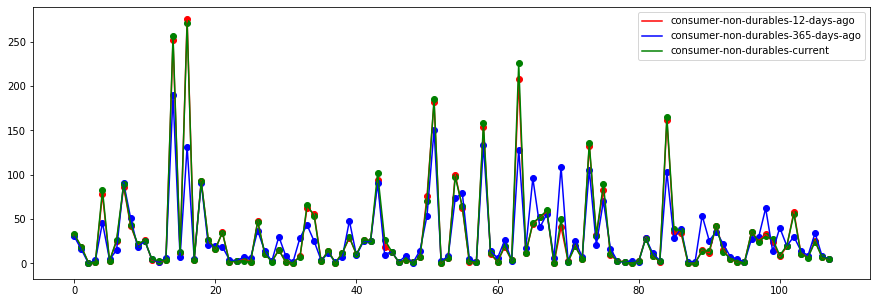

In [84]:
data.consumer_non_durables()

Text(0, 0.5, 'Percent change')

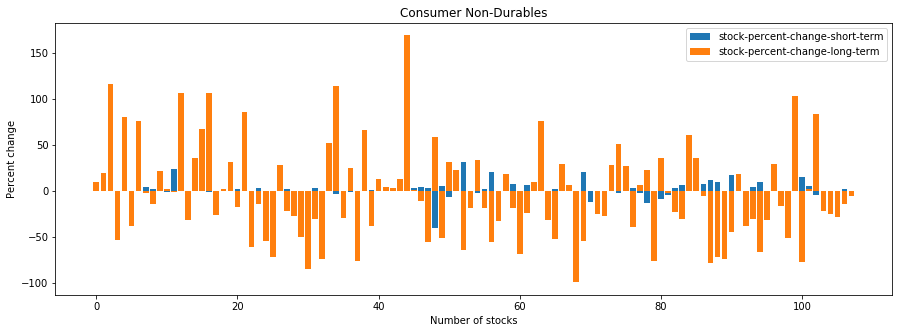

In [86]:
consumer_non_durables_percent_change_long_term = []
consumer_non_durables_percent_change_short_term = []
for i in range(len(data.consumer_non_durables_short_term)):
    consumer_non_durables_percent_change_short_term.append((data.consumer_non_durables_current[i] - data.consumer_non_durables_short_term[i]) / data.consumer_non_durables_short_term[i] * 100)
    
for i in range(len(data.consumer_non_durables_long_term)):
    consumer_non_durables_percent_change_long_term.append((data.consumer_non_durables_current[i] - data.consumer_non_durables_long_term[i]) / data.consumer_non_durables_long_term[i] * 100)

plt.figure(figsize=(15,5))
x = np.arange(0, len(consumer_non_durables_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, consumer_non_durables_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, consumer_non_durables_percent_change_long_term, label="stock-percent-change-long-term")
plt.title("Consumer Non-Durables")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


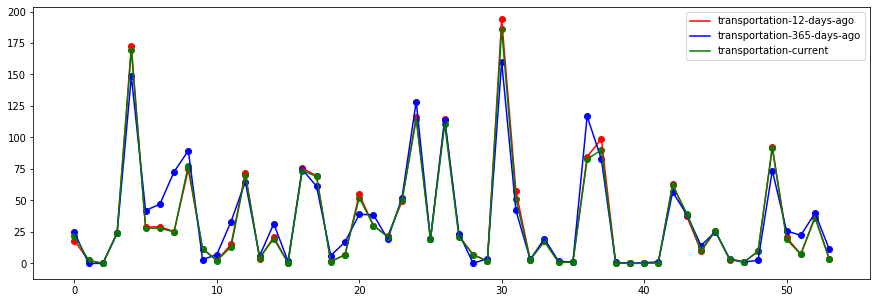

In [38]:
data.transportation()

Text(0, 0.5, 'Percent change')

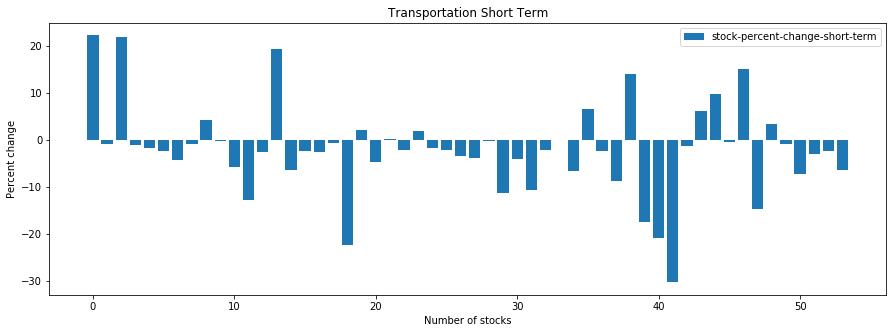

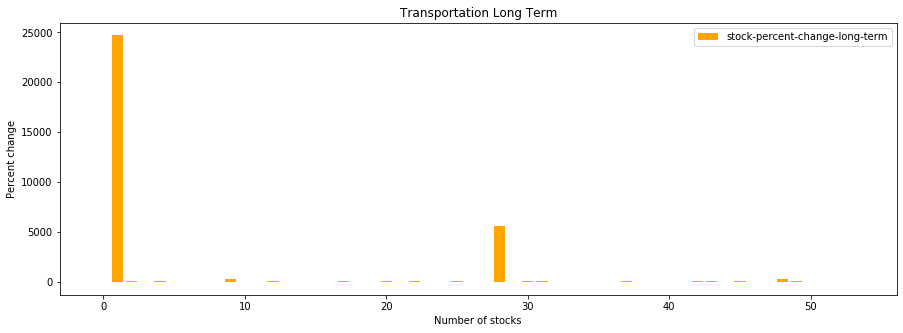

In [41]:
transportation_percent_change_long_term = []
transportation_percent_change_short_term = []
for i in range(len(data.transportation_short_term)):
    transportation_percent_change_short_term.append((data.transportation_current[i] - data.transportation_short_term[i]) / data.transportation_short_term[i] * 100)
    
for i in range(len(data.transportation_long_term)):
    if(not(data.transportation_long_term[i] == 0)):
        transportation_percent_change_long_term.append((data.transportation_current[i] - data.transportation_long_term[i]) / data.transportation_long_term[i] * 100)
    
plt.figure(figsize=(15,5))
x_short = np.arange(0, len(transportation_percent_change_short_term))
x_long = np.arange(0, len(transportation_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x_short, transportation_percent_change_short_term, label="stock-percent-change-short-term")
plt.title("Transportation Short Term")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

plt.figure(figsize=(15,5))
plt.bar(x_long, transportation_percent_change_long_term, color="orange", label="stock-percent-change-long-term")
plt.title("Transportation Long Term")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


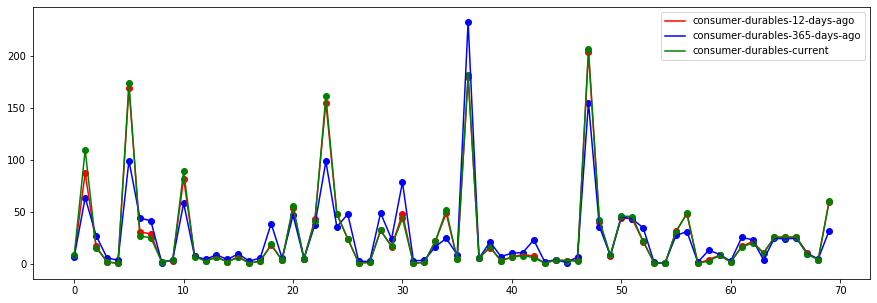

In [87]:
data.consumer_durables()

Text(0, 0.5, 'Percent change')

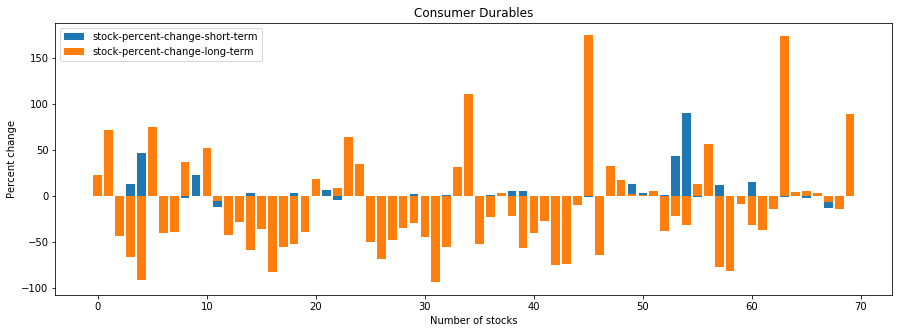

In [102]:
consumer_durables_percent_change_long_term = []
consumer_durables_percent_change_short_term = []
for i in range(len(data.consumer_durables_short_term)):
    consumer_durables_percent_change_short_term.append((data.consumer_durables_current[i] - data.consumer_durables_short_term[i]) / data.consumer_durables_short_term[i] * 100)
    
for i in range(len(data.consumer_durables_long_term)):
    consumer_durables_percent_change_long_term.append((data.consumer_durables_current[i] - data.consumer_durables_long_term[i]) / data.consumer_durables_long_term[i] * 100)

plt.figure(figsize=(15,5))
x = np.arange(0, len(consumer_durables_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, consumer_durables_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, consumer_durables_percent_change_long_term, label="stock-percent-change-long-term")
plt.title("Consumer Durables")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


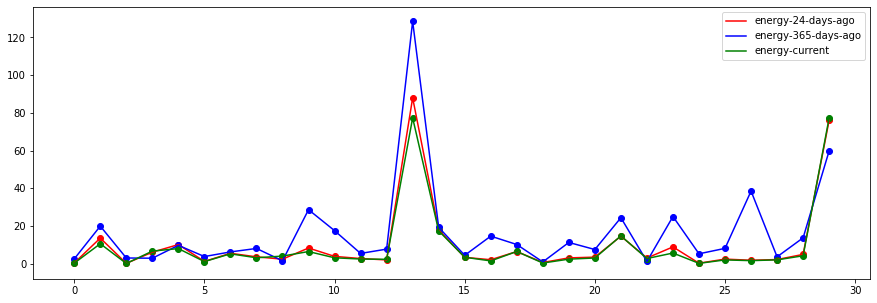

In [98]:
data.energy()

Text(0, 0.5, 'Percent change')

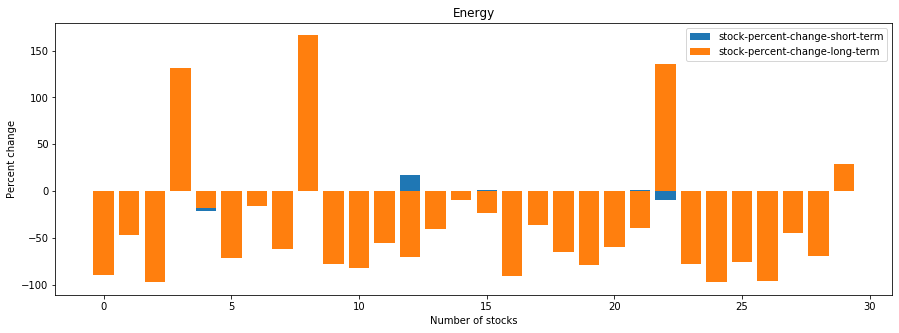

In [103]:
energy_percent_change_long_term = []
energy_percent_change_short_term = []
for i in range(len(data.energy_short_term)):
    energy_percent_change_short_term.append((data.energy_current[i] - data.energy_short_term[i]) / data.energy_short_term[i] * 100)
    
for i in range(len(data.energy_long_term)):
    energy_percent_change_long_term.append((data.energy_current[i] - data.energy_long_term[i]) / data.energy_long_term[i] * 100)

plt.figure(figsize=(15,5))
x = np.arange(0, len(energy_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, energy_percent_change_short_term, label="stock-percent-change-short-term")
plt.bar(x, energy_percent_change_long_term, label="stock-percent-change-long-term")
plt.title("Energy")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


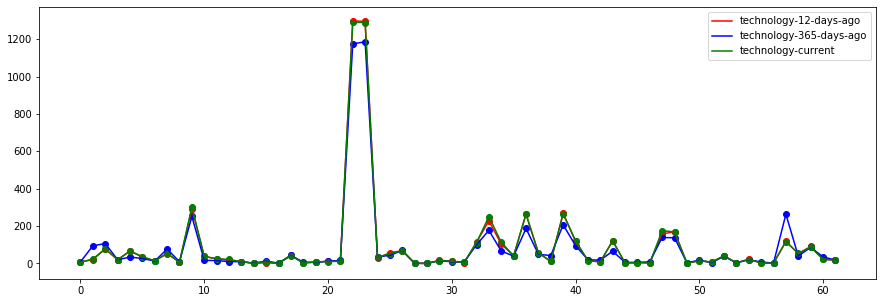

In [43]:
data.technology()

Text(0, 0.5, 'Percent change')

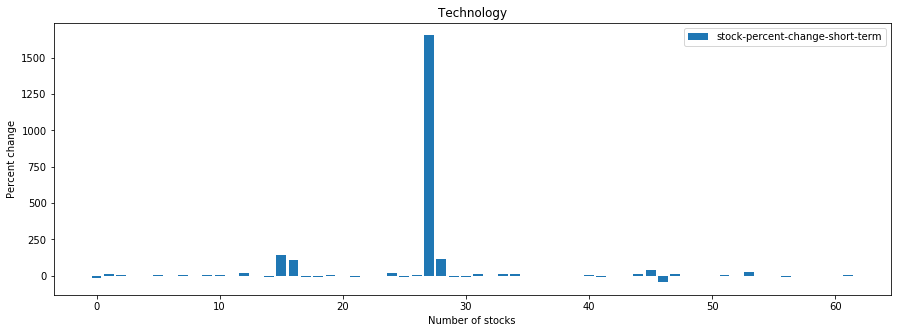

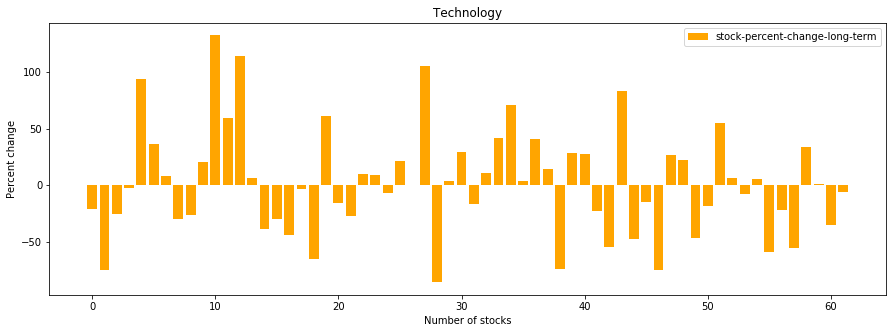

In [45]:
technology_percent_change_long_term = []
technology_percent_change_short_term = []
for i in range(len(data.technology_short_term)):
    technology_percent_change_short_term.append((data.technology_current[i] - data.technology_short_term[i]) / data.technology_short_term[i] * 100)
    
for i in range(len(data.technology_long_term)):
    technology_percent_change_long_term.append((data.technology_current[i] - data.technology_long_term[i]) / data.technology_long_term[i] * 100)

plt.figure(figsize=(15,5))
x = np.arange(0, len(technology_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x, technology_percent_change_short_term, label="stock-percent-change-short-term")
plt.title("Technology")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

plt.figure(figsize=(15,5))
plt.bar(x, technology_percent_change_long_term, color="orange", label="stock-percent-change-long-term")
plt.title("Technology")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

Done!


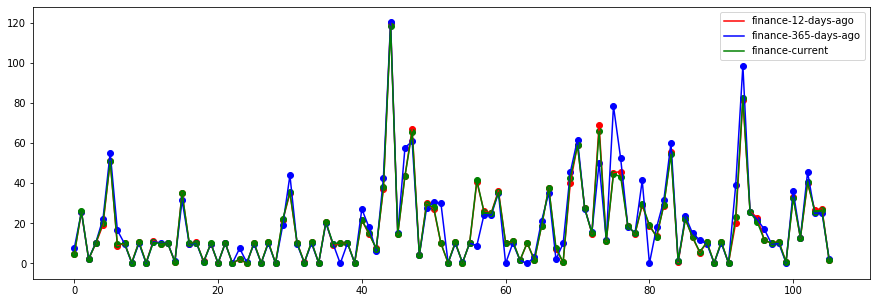

In [57]:
data.finance()

Text(0, 0.5, 'Percent change')

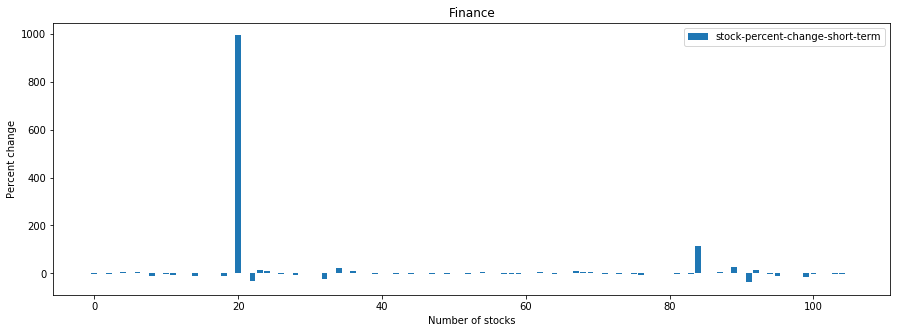

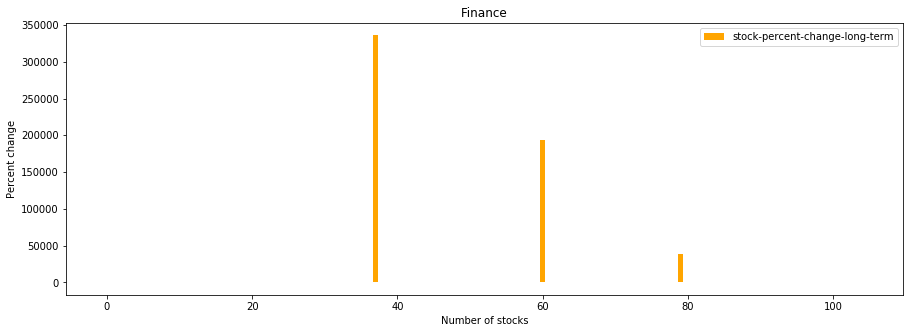

In [60]:
finance_percent_change_long_term = []
finance_percent_change_short_term = []
for i in range(len(data.finance_short_term)):
    finance_percent_change_short_term.append((data.finance_current[i] - data.finance_short_term[i]) / data.finance_short_term[i] * 100)
    
for i in range(len(data.finance_long_term)):
    if(data.finance_long_term[i] > 0):
        finance_percent_change_long_term.append((data.finance_current[i] - data.finance_long_term[i]) / data.finance_long_term[i] * 100)

plt.figure(figsize=(15,5))
x_short = np.arange(0, len(finance_percent_change_short_term))
x_long = np.arange(0, len(finance_percent_change_long_term))
'''plt.scatter(x, miscellaneous_percent_change_short_term, c='red')
plt.scatter(x, miscellaneous_percent_change_long_term, c='blue')'''

plt.bar(x_short, finance_percent_change_short_term, label="stock-percent-change-short-term")
plt.title("Finance")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

plt.figure(figsize=(15,5))
plt.bar(x_long, finance_percent_change_long_term, color='orange', label="stock-percent-change-long-term")
plt.title("Finance")
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Percent change')

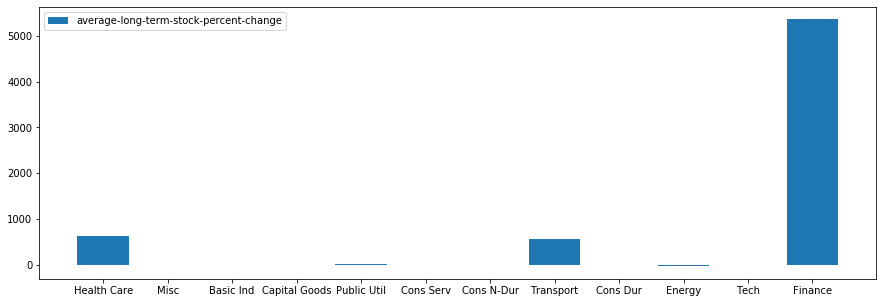

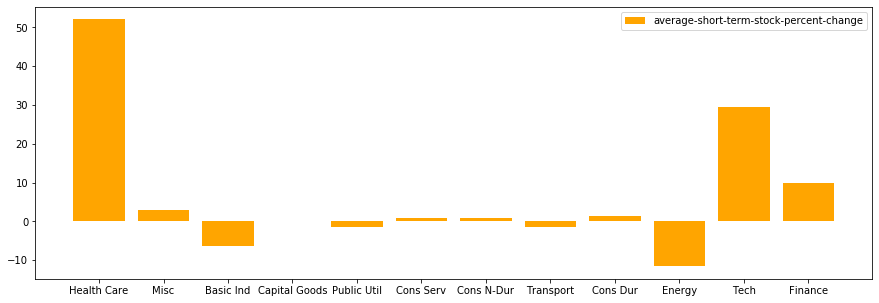

In [133]:
average_percent_change_short_term = []
average_percent_change_long_term = []

average_percent_change_short_term.append(np.mean(health_care_percent_change_short_term))
average_percent_change_short_term.append(np.mean(miscellaneous_percent_change_short_term))
average_percent_change_short_term.append(np.mean(basic_industries_percent_change_short_term))
average_percent_change_short_term.append(np.mean(capital_goods_percent_change_short_term))
average_percent_change_short_term.append(np.mean(public_utilities_percent_change_short_term))
average_percent_change_short_term.append(np.mean(consumer_services_percent_change_short_term))
average_percent_change_short_term.append(np.mean(consumer_non_durables_percent_change_short_term))
average_percent_change_short_term.append(np.mean(transportation_percent_change_short_term))
average_percent_change_short_term.append(np.mean(consumer_durables_percent_change_short_term))
average_percent_change_short_term.append(np.mean(energy_percent_change_short_term))
average_percent_change_short_term.append(np.mean(technology_percent_change_short_term))
average_percent_change_short_term.append(np.mean(finance_percent_change_short_term))


average_percent_change_long_term.append(np.mean(health_care_percent_change_long_term))
average_percent_change_long_term.append(np.mean(miscellaneous_percent_change_long_term))
average_percent_change_long_term.append(np.mean(basic_industries_percent_change_long_term))
average_percent_change_long_term.append(np.mean(capital_goods_percent_change_long_term))
average_percent_change_long_term.append(np.mean(public_utilities_percent_change_long_term))
average_percent_change_long_term.append(np.mean(consumer_services_percent_change_long_term))
average_percent_change_long_term.append(np.mean(consumer_non_durables_percent_change_long_term))
average_percent_change_long_term.append(np.mean(transportation_percent_change_long_term))
average_percent_change_long_term.append(np.mean(consumer_durables_percent_change_long_term))
average_percent_change_long_term.append(np.mean(energy_percent_change_long_term))
average_percent_change_long_term.append(np.mean(technology_percent_change_long_term))
average_percent_change_long_term.append(np.mean(finance_percent_change_long_term))

x = ['Health Care', 'Misc', 'Basic Ind', 'Capital Goods', 'Public Util', 'Cons Serv', 'Cons N-Dur', 'Transport', 'Cons Dur', 'Energy', 'Tech', 'Finance']

plt.figure(figsize=(15,5))
plt.bar(x, average_percent_change_long_term, label="average-long-term-stock-percent-change")
plt.legend()
plt.figure(figsize=(15,5))
plt.bar(x, average_percent_change_short_term, color='orange', label="average-short-term-stock-percent-change")
plt.legend()

### Results

#### Long Term Model

We see through our results that stocks in the finance sector on average perform exceptionally well over the course of about 1 year for long term investments showing over a 5000% increase and transport as well as health care perform quite well too showing about a 700% increase over the course 1 year. We see that essentially all other stocks do not perform well at all over the course of about 1 year since their percent change is hardly visible or essentially zero. 

#### Short Term Model

When changing over to look at the short term percent change, which is over the course of 12 business days to reiterate, we see that health care once again performs relatively well showing just over a 50% percent change and technology shows a decent 30% growth as well. Finance shows slower growth with 10% but growth nonetheless. Energy and basic industries, however, both show a decrease in price over the span of 12 days which is of course an indication to stay away from that sector if you plan on investing over a short term.

#### Solution

We can see that for long term investment finance is by far the best sector to invest in with health care and transport being solid choices second and third as well. For short term investments we can see that health is an exceptional choice as well and tech proves to show nice return as well and finance shows fair results over the span of 12 days.

### Discussion and Conclusion

I learned that in order to have the strongest investment portfolio, it's smartest to strategically invest both long term and short term across the appropriate sector that supports growth for each interval of time. The obstacles I ran into were filtering the data set I imported using pandas because there were data that were formatted incorrectly, and accounting for a divide by zero error when calculating the percent change for a long term investment for some of the given sectors. Next time I would try to use much larger data sets and many more sectors so that I would have much more accurate and precise data so that I could ideally use the data analysis as part of my personal stock investment strategy. 

The answer to my question would be that finance stocks are the objective best to invest in over the long term since they show just over a 5000% increase over the course of 1 year whereas health care and transport show about a 700% over a year and the remaining sectors show insignificant growth over a year's time. 

### References

1) “Commission-Free API First Stock Brokerage.” Alpaca, AlpacaDB, Inc., alpaca.markets/

2) “Download Market Data.” End of Day Stock Quote Data and Historical Stock Prices, eoddata.com/.